In [2]:
#Importamos las bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# ESTO ES LO IMPORTANTE: Importamos el script 
import toolbox_ML as tb 

# Configuración visual opcional
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")

In [3]:
# 1. Cargar datos
df = pd.read_csv('data/titanic.csv')

# 2. Preparación para la Demo (Simulamos un dataset real con imperfecciones)
# Introducimos nulos para probar que describe_df funciona
df.loc[0:15, 'age'] = np.nan            
df.loc[50:55, 'embark_town'] = np.nan   

print("Dataset Titanic cargado con éxito.")
print(f"Dimensiones: {df.shape}")
df.head()

Dataset Titanic cargado con éxito.
Dimensiones: (891, 11)


,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,male,NaN,1,0,7.2500,Third,man,True,Southampton,no,False
1,female,NaN,1,0,71.2833,First,woman,False,Cherbourg,yes,False
2,female,NaN,0,0,7.9250,Third,woman,False,Southampton,yes,True
3,female,NaN,1,0,53.1000,First,woman,False,Southampton,yes,False
4,male,NaN,0,0,8.0500,Third,man,True,Southampton,no,True


**1 - Función: describe_df**

In [4]:
# Probamos la función de descripción
resumen = tb.describe_df(df)

# Mostramos el resultado
resumen

,COL_N,sex,age,sibsp,parch,fare,class,who,adult_male,embark_town,alive,alone
0,DATA_TYPE,object,float64,int64,int64,float64,object,object,bool,object,object,bool
1,MISSINGS (%),0.0,1.795735,0.0,0.0,0.0,0.0,0.0,0.0,0.673401,0.0,0.0
2,UNIQUE_VALUES,2,89,7,7,248,3,3,2,3,2,2
3,CARDIN (%),0.224467,9.988777,0.785634,0.785634,27.833895,0.3367,0.3367,0.224467,0.3367,0.224467,0.224467


**2 - Función: tipifica_variables**

In [7]:
# Probamos la tipificación automática
tipos = tb.tipifica_variables(df, umbral_categoria=5, umbral_continua=20)

tipos

,nombre_variable,tipo_sugerido
0,sex,Binaria
1,age,Numérica discreta
2,sibsp,Numérica discreta
3,parch,Numérica discreta
4,fare,Numérica continua
5,class,Categórica
6,who,Categórica
7,adult_male,Binaria
8,embark_town,Categórica
9,alive,Binaria


**3 - Función: get_features_num_regression**

In [13]:
target = "fare"

# Buscamos variables numéricas correlacionadas con el precio
# Ponemos un umbral bajo (0.1) para que salgan cosas
features_num = tb.get_features_num_regression(df, target_col=target, umbral_corr=0.05, pvalue=0.05) #pvalue por defecto es None

print(f"Variables numéricas relacionadas con '{target}': {features_num}")

La variable fare se puede considerar variable target, ya que es numérica continua.
Variable 'age' seleccionada: p-value = 0.0199 (relación estadísticamente significativa).
Variable 'sibsp' seleccionada: p-value = 0.0000 (relación estadísticamente significativa).
Variable 'parch' seleccionada: p-value = 0.0000 (relación estadísticamente significativa).
Variables numéricas relacionadas con 'fare': ['age', 'sibsp', 'parch']


**4 - Función: plot_features_num_regression**

In [18]:
# Visualizamos esas relaciones con la función de plot
# Esto debería generar pairplots paginados
tb.plot_features_num_regression(df, target_col=target, columns=["alive", "sex"], umbral_corr=0.1, pvalue=0.1)

Error: columns contiene columnas no numéricas: ['alive', 'sex']


**5 - Función: get_features_cat_regression**

In [23]:
# Buscamos variables categóricas que influyan en el precio (Test ANOVA)
features_cat = tb.get_features_cat_regression(df, target_col=target, pvalue=0.05)

print(f"Variables categóricas relacionadas con '{target}': {features_cat}")

Variables categóricas relacionadas con 'fare': ['sex', 'class', 'who', 'embark_town', 'alive']


**6 - Funcion: plot_features_cat_regression**

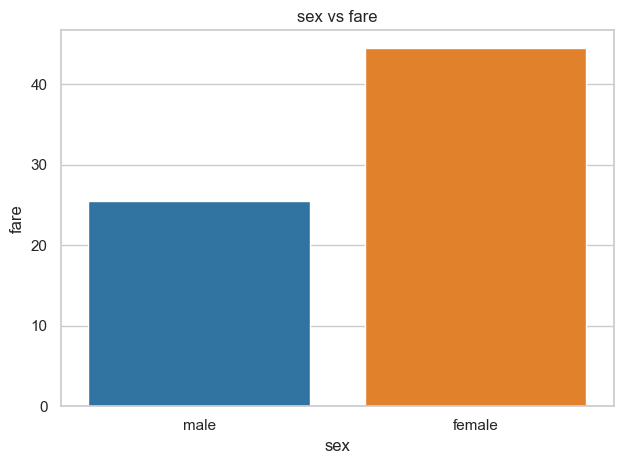

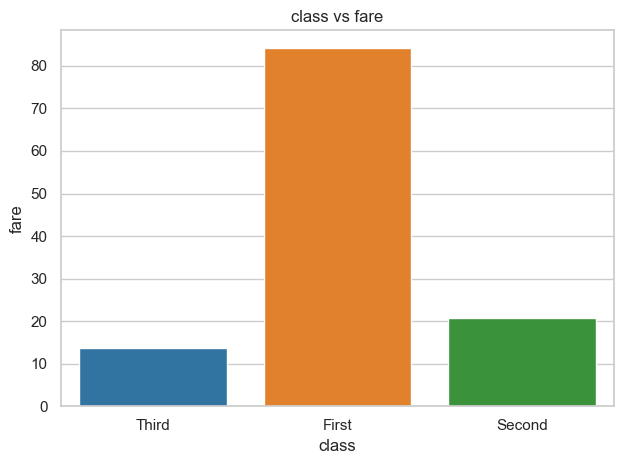

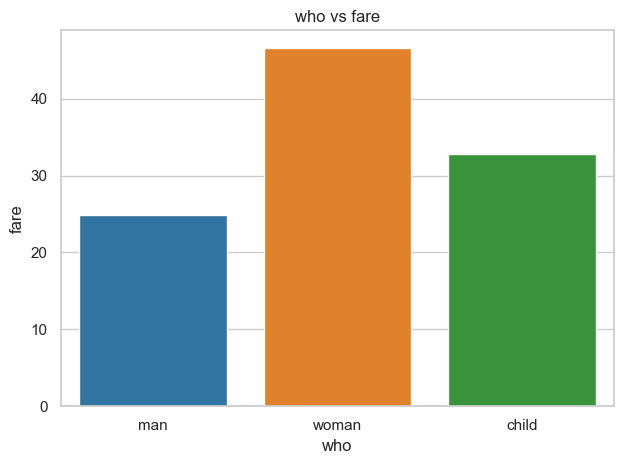

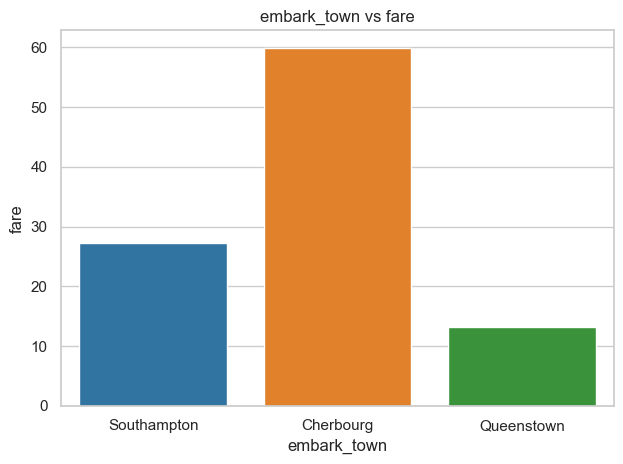

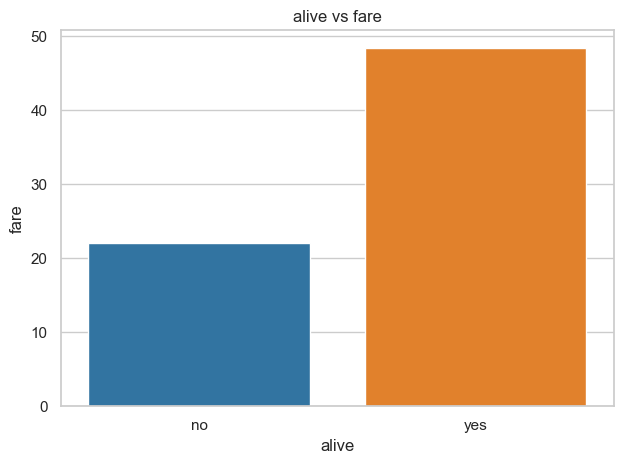

['sex', 'class', 'who', 'embark_town', 'alive']

In [24]:
# Visualizamos la relación de estas categorías con el precio
tb.plot_features_cat_regression2(df, target_col=target, columns=features_cat, with_individual_plot=True)